In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic

path_dataset = "data/base_test_sv_reg_working.csv"
data_sv = pd.read_csv(path_dataset,
                      index_col="date",
                      parse_dates=True,
                      infer_datetime_format=True)

# Dropping irrelevant "Segment" column:
# data_sv = data_sv.drop(labels="Segment", axis=1)
# Normalizing columns names:
data_sv.columns = data_sv.columns.str.strip().str.replace(" ", "_")
data_sv.columns = data_sv.columns.str.lower()

x_features = data_sv.drop(labels="qlead_auto", axis=1)
y_target = data_sv["qlead_auto"]

nb_rows, nb_features = x_features.shape
print(f"{nb_rows} rows in the dataset.")
print(f"{nb_features} features in the dataset.")

644 rows in the dataset.
27 features in the dataset.


<AxesSubplot:>

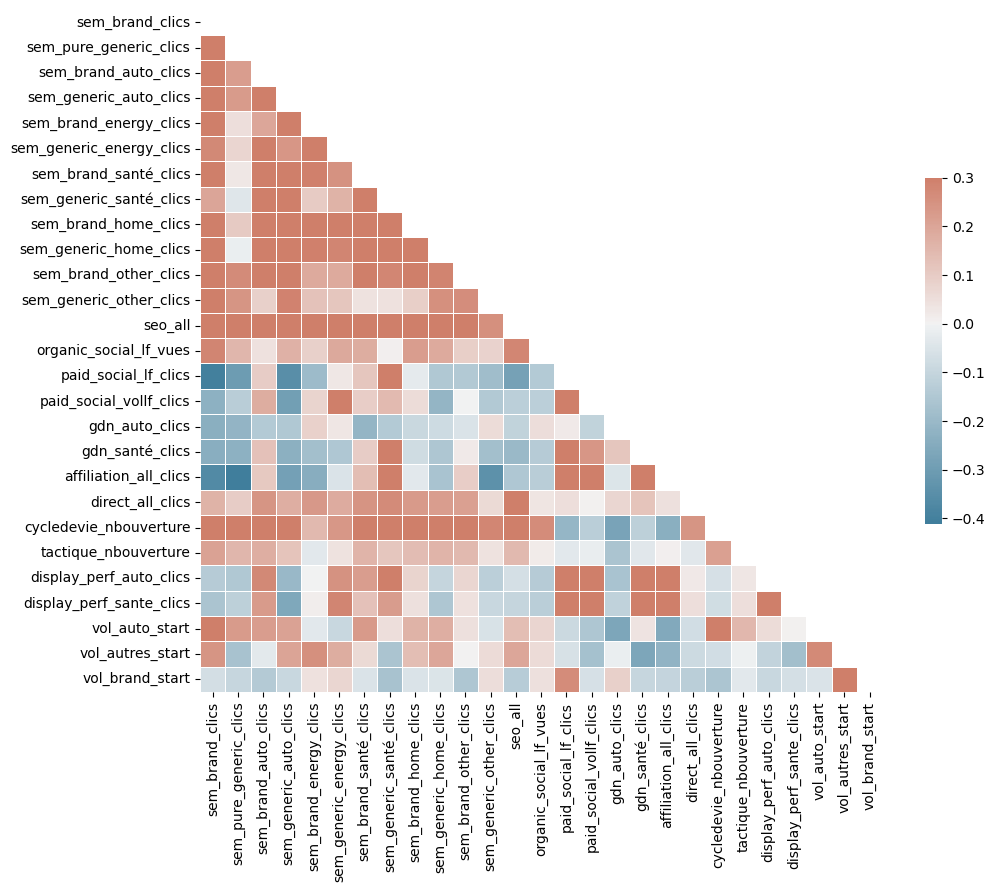

In [2]:
# Compute the correlation matrix
corr = x_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

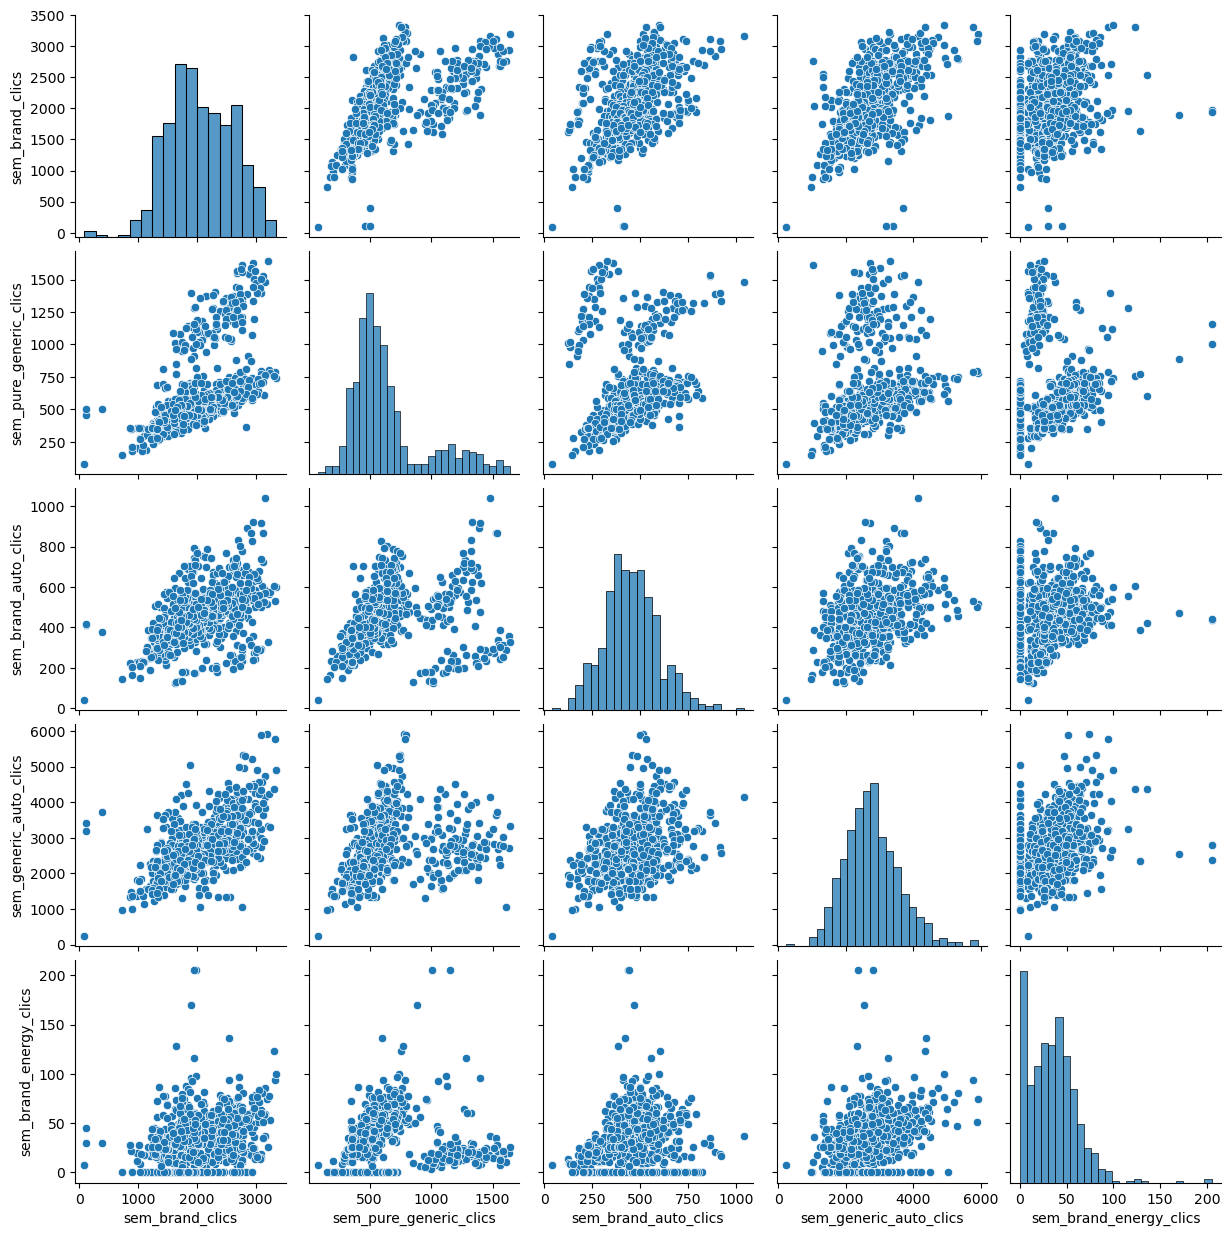

In [3]:
sns.pairplot(x_features.iloc[:, :5])

In [7]:
from scipy.stats import pearsonr
feature_1 = x_features.sem_brand_clics.tolist()
feature_2 = x_features.sem_brand_energy_clics.tolist()
pearsonr(feature_1, feature_2)

PearsonRResult(statistic=0.3008189949990836, pvalue=6.1666486758772405e-15)